# Autoencoder & Image Augmentation

## Autoencoder

In [1]:
import tensorflow as tf
import numpy as np

# mnist
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_y.shape)

train_X = train_X / 255.0
test_X = test_X / 255.0

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [2]:
# 데이터 확인
import matplotlib.pyplot as plt
plt.imshow(train_X[0].reshape(28, 28), cmap = 'gray')
plt.colorbar()
plt.show()
print(train_y[0])

5


In [3]:
# encoder, decoder 확인
train_X = train_X.reshape(-1, 28 * 28)
test_X = test_X.reshape(-1, 28 * 28)
print(train_X.shape, train_y.shape)

model = tf.keras.Sequential([
    # 28 * 28 = 784
    tf.keras.layers.Dense(784, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'), # Latent Vector(잠재 변수)
    tf.keras.layers.Dense(784, activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

(60000, 784) (60000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 784)               50960     
                                                                 
Total params: 716640 (2.73 MB)
Trainable params: 716640 (2.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
model.fit(train_X, train_X, epochs = 10, batch_size = 256)

Epoch 1/10
235/235 [==============================] - 9s 34ms/step - loss: 0.0502
Epoch 2/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0176
Epoch 3/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0124
Epoch 4/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0103
Epoch 5/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0092
Epoch 6/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0084
Epoch 7/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0079
Epoch 8/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0075
Epoch 9/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0072
Epoch 10/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0070


1/1 [==============================] - 0s 39ms/step


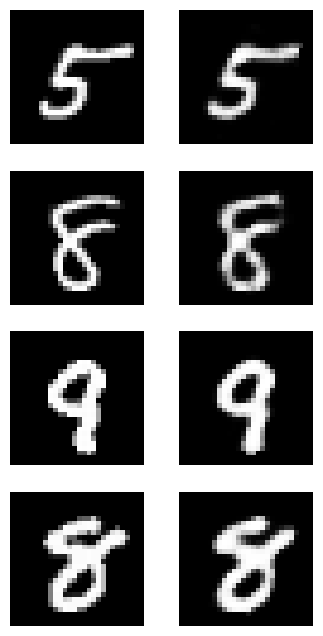

313/313 [==============================] - 2s 6ms/step - loss: 0.0066


0.006648749578744173

In [5]:
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0]) # 랜덤하게 선택된 인덱스
    # test_X에서 해당 인덱스의 이미지를 확인
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(4, 2, c*2+2)
    # 해당 인덱스의 이미지를 predict시키고 결과를 출력하게 함
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)

화질이 조금 떨어지긴 했지만, 자기 자신을 잘 표현하고 있는 것 같다.

이번에는 CNN을 활용해보자.

In [6]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    # 사이즈 : (28, 28)
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='relu', input_shape=(28, 28, 1)), # (14, 14)
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='relu'), # (7, 7)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'), # Latent Vector(잠재 변수)
    tf.keras.layers.Dense(7*7*64, activation='relu'),
    tf.keras.layers.Reshape(target_shape=(7, 7, 64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same',activation='relu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same',activation='sigmoid'),
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                200768    
                                                                 
 dense_4 (Dense)             (None, 3136)              203840    
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 32)       

In [7]:
model.fit(train_X, train_X, epochs = 20, batch_size = 256)

Epoch 1/20
235/235 [==============================] - 25s 99ms/step - loss: 0.0779
Epoch 2/20
235/235 [==============================] - 19s 80ms/step - loss: 0.0334
Epoch 3/20
235/235 [==============================] - 18s 78ms/step - loss: 0.0213
Epoch 4/20
235/235 [==============================] - 17s 74ms/step - loss: 0.0182
Epoch 5/20
235/235 [==============================] - 17s 74ms/step - loss: 0.0169
Epoch 6/20
235/235 [==============================] - 19s 81ms/step - loss: 0.0159
Epoch 7/20
235/235 [==============================] - 19s 79ms/step - loss: 0.0154
Epoch 8/20
235/235 [==============================] - 23s 99ms/step - loss: 0.0151
Epoch 9/20
235/235 [==============================] - 22s 94ms/step - loss: 0.0148
Epoch 10/20
235/235 [==============================] - 20s 87ms/step - loss: 0.0146
Epoch 11/20
235/235 [==============================] - 23s 100ms/step - loss: 0.0145
Epoch 12/20
235/235 [==============================] - 20s 84ms/step - loss: 0.0144


In [8]:
plt.figure(figsize=(4, 8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)

1/1 [==============================] - 0s 20ms/step


313/313 [==============================] - 3s 8ms/step - loss: 0.0129


0.012897240929305553

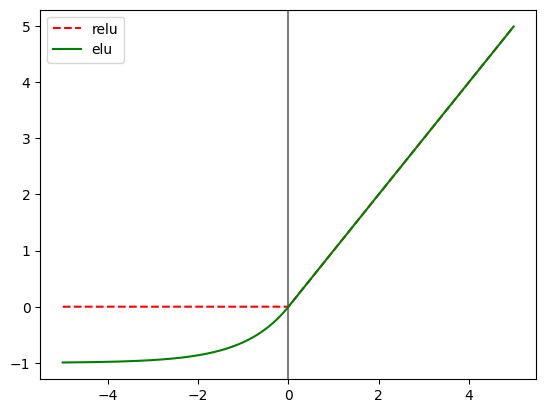

In [9]:
# ELU(초록색 그래프)
# RELU가 연산량의 측면에서 좋을지 몰라도
# 성능이 안 좋을 수 있으니, 음의 값을 살짝이라도 가질 수 있게끔 해줌

import math

x = np.arange(-5, 5, 0.01)
relu = [0 if z<0 else z for z in x]
elu = [1.0 * (np.exp(z)-1) if z <0 else z for z in x]

plt.axvline(0, color='gray')
plt.plot(x, relu, 'r--', label='relu')
plt.plot(x, elu, 'g-', label='elu')
plt.legend()
plt.show()

activation 을 elu로 교체하고 다시 돌려보자

In [10]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='elu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='elu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dense(7*7*64, activation='elu'),
    tf.keras.layers.Reshape(target_shape=(7, 7, 64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same',activation='elu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same',activation='sigmoid'),
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_5 (Dense)             (None, 64)                200768    
                                                                 
 dense_6 (Dense)             (None, 3136)              203840    
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 14, 14, 32)       

In [11]:
model.fit(train_X, train_X, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 20s 82ms/step - loss: 0.0556
Epoch 2/20
235/235 [==============================] - 24s 101ms/step - loss: 0.0194
Epoch 3/20
235/235 [==============================] - 26s 111ms/step - loss: 0.0130
Epoch 4/20
235/235 [==============================] - 26s 110ms/step - loss: 0.0110
Epoch 5/20
235/235 [==============================] - 23s 98ms/step - loss: 0.0100
Epoch 6/20
235/235 [==============================] - 27s 113ms/step - loss: 0.0095
Epoch 7/20
235/235 [==============================] - 22s 92ms/step - loss: 0.0091
Epoch 8/20
235/235 [==============================] - 19s 82ms/step - loss: 0.0088
Epoch 9/20
235/235 [==============================] - 20s 87ms/step - loss: 0.0085
Epoch 10/20
235/235 [==============================] - 20s 83ms/step - loss: 0.0083
Epoch 11/20
235/235 [==============================] - 24s 102ms/step - loss: 0.0080
Epoch 12/20
235/235 [==============================] - 21s 90ms/step - loss: 0.0

1/1 [==============================] - 0s 33ms/step


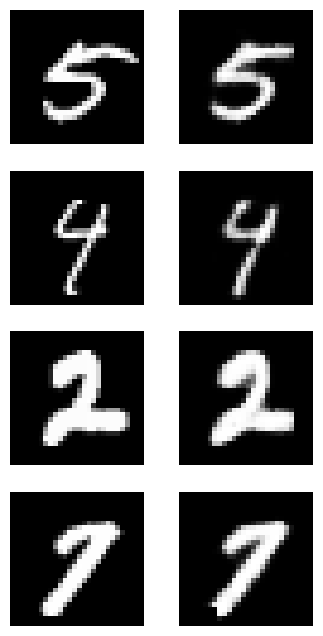

313/313 [==============================] - 3s 9ms/step - loss: 0.0066


0.006620232481509447

In [12]:
plt.figure(figsize=(4, 8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)

화질이 좋아진 것을 보아 Latent Vector(잠재 변수)가 입력 데이터의 특성을 잘 줄였다고 생각할 수 있다.

In [13]:
# 잠재변수 벡터 확보
latent_vector_model = tf.keras.Model(inputs=model.input,
                                     outputs=model.layers[3].output) # 잠재변수에 해당하는 레이어
latent_vector = latent_vector_model.predict(train_X)
print(latent_vector.shape)
print(latent_vector[0])

1875/1875 [==============================] - 7s 4ms/step
(60000, 64)
[-0.99999994 -1.         28.330353   13.206143   12.142693   -0.9895129
 27.860275   -1.         28.985048   -1.         -1.         -0.9999996
 26.318567   -0.99999994  4.4662538   6.6027317  44.770298   -1.
 -1.         19.500216   -1.         14.769381    9.761003   -1.
 -1.         -1.         32.0273     -0.99999994 11.629311    6.6955075
 17.97229     9.108699   11.305475   29.463472   -1.         29.0021
 34.5756     21.641035   -1.         37.285557    1.1179386  -1.
 15.0890255  20.040247   -1.         -1.         -1.         -0.9999999
 -1.         -1.          6.9293394  -1.         -0.9999997  -1.
 -1.         -0.99999994 18.90587    18.581886   -0.9999999  13.719904
 -1.         -1.         -1.          9.551015  ]


In [14]:
# 추출한 잠재변수들을 군집
%%time
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans.fit(latent_vector)

CPU times: user 13.8 s, sys: 2.14 s, total: 15.9 s
Wall time: 11 s


KMeans(n_clusters=10, n_init=10, random_state=42)

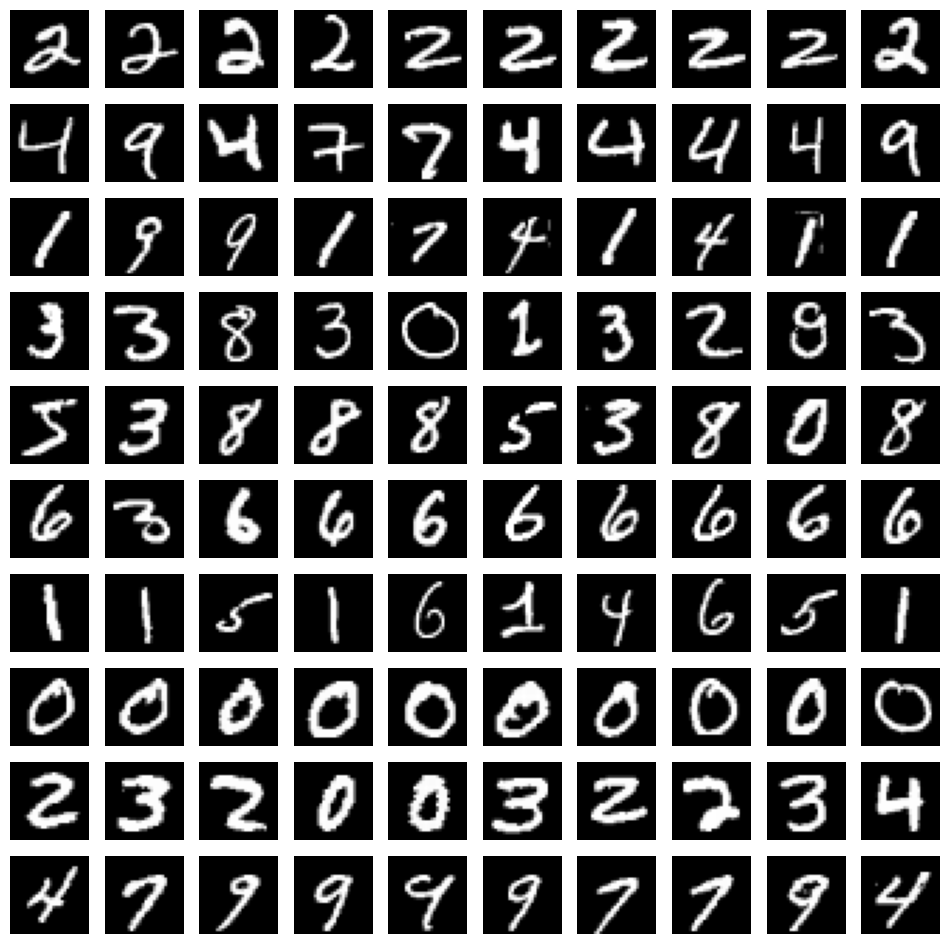

In [15]:
plt.figure(figsize=(12, 12))

for i in range(10):
    images = train_X[kmeans.labels_ == i] # 라벨별로 추출하게 함
    for c in range(10):
        plt.subplot(10, 10, i*10+c+1)
        plt.imshow(images[c].reshape(28, 28), cmap='gray')
        plt.axis('off')

plt.show()

0과 1, 2, 6은 잘 구분하는 것 같음

### t-SNE
고차원의 벡터를 저차원으로 옮겨서 시각화에 도움을 주는 방법으로

k-means가 각 클러스터를 계산하기 위한 단위로 중심과 각 데이터의 거리를 측정한다면 t-SNE는 각 데이터의 유사도를 정의하고 원래 공간에서의 유사도와 저차원 공간에서의 유사도가 비슷해지도록 학습을 시킨다.

이때 유사도는 수학적으로 확률로 표현된다.

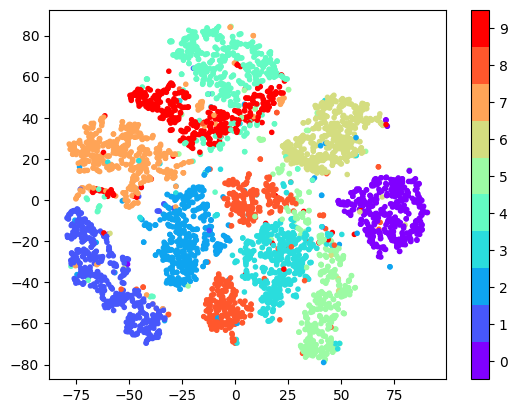

CPU times: user 1min 5s, sys: 298 ms, total: 1min 5s
Wall time: 41.9 s


In [16]:
%%time
from sklearn.manifold import TSNE

# perplexity : t-SNE가 각 데이터 포인트를 임베딩 과정에서 고려할 이웃의 수
#             보통 5 ~ 50 사이의 값을 가짐

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

cmap = plt.get_cmap('rainbow', 10)
fig = plt.scatter(tsne_vector[:, 0], tsne_vector[:, 1], marker='.', c=train_y[:5000], cmap=cmap)
cb = plt.colorbar(fig, ticks=range(10))
n_clusters=10
tick_locs = (np.arange(n_clusters)+ 0.5)*(n_clusters-1)/n_clusters
cb.set_ticks(tick_locs)
cb.set_ticklabels(range(10))

plt.show()

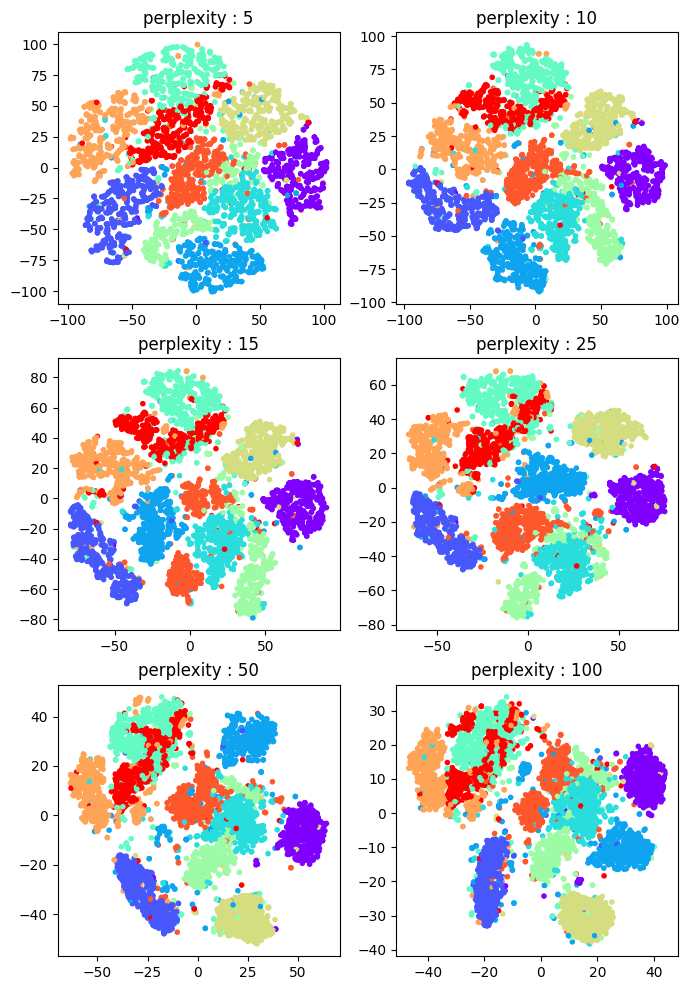

CPU times: user 8min 17s, sys: 2.04 s, total: 8min 19s
Wall time: 6min 1s


In [17]:
# perplexity 튜닝
%%time

perplexities = [5, 10, 15, 25, 50, 100]
plt.figure(figsize = (8, 12))

for c in range(6):
  tsne = TSNE(n_components=2, learning_rate=100, perplexity=perplexities[c], random_state=0)
  tsne_vector = tsne.fit_transform(latent_vector[:5000])

  plt.subplot(3, 2, c+1)
  plt.scatter(tsne_vector[:, 0], tsne_vector[:, 1], marker='.', c=train_y[:5000], cmap=cmap)
  plt.title('perplexity : {0}'.format(perplexities[c]))
plt.show()

In [18]:
# 더 구체적으로 시각화
# 군집화된 시각화에 이미지까지 표시되도록 함

from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

plt.figure(figsize = (16, 16))

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

ax = plt.subplot(1, 1, 1)
ax.scatter(tsne_vector[:, 0], tsne_vector[:, 1], marker='.', c=train_y[:5000], cmap='rainbow')
for i in range(200):
  imagebox = OffsetImage(train_X[i].reshape(28, 28))
  ab = AnnotationBbox(imagebox, tsne_vector[i, 0], tsne_vector[i,1], frameon = False, pad = 0.0)
  ax.add_artist(ab)

ax.set_xticks([])
ax.set_yticks([])
plt.show()

TypeError: ignored

<Figure size 1600x1600 with 1 Axes>

## Image Augmentation

In [19]:
import tensorflow_datasets as tfds
# 데이터 준비
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split = ['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info = True,
    as_supervised = True
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [20]:
# output 클래스 개수
num_classes = metadata.features['label'].num_classes
num_classes

5

In [21]:
# output 클래스 종류
get_label_name = metadata.features['label'].int2str
[get_label_name(n) for n in range(5)]

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

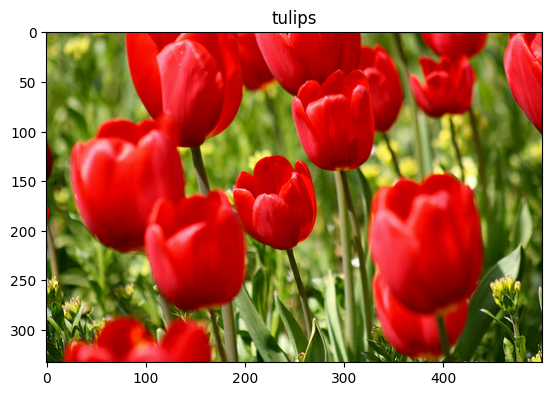

In [22]:
# 데이터 이미지 확인
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [23]:
# 크기 및 비율 조정
from tensorflow.keras import layers

IMG_SIZE = 180

# 전처리도 레이어처럼 구현할 수도 있다
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

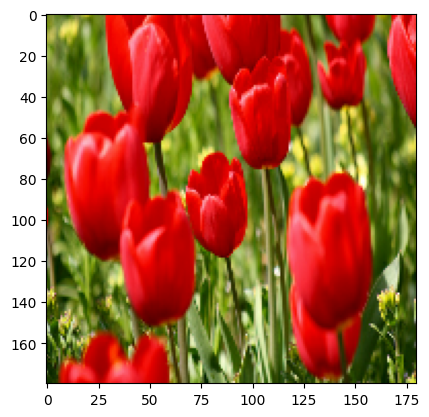

In [24]:
# 확인
result = resize_and_rescale(image)
_ = plt.imshow(result)

In [25]:
# 바뀐 픽셀 범위 확인
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.0 1.0


이미지 증강

In [26]:
# 회전
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [27]:
# 현재 image 상태
image.shape

TensorShape([333, 500, 3])

In [28]:
# 현재 이미지로 배치를 만들어줌
image = tf.expand_dims(image, 0)
image.shape

TensorShape([1, 333, 500, 3])

In [29]:
# 이미지 증강된 이미지 확인
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

### 모델에서 이미지 증강 구현하기

증강을 모델에서도 구현할 수 있다.

나머지 레이어와 동기적으로 기기에서 실행되어 GPU의 가속을 이용할 수 있다.



#### 방법 1: 전처리 레이어를 모델의 일부로 만들기

In [30]:
# 방법 1: 전처리 레이어를 모델의 일부로 만들기
model = tf.keras.Sequential([
  resize_and_rescale, # resize, rescale
  data_augmentation, # 이미지 증강
  # 모델 시작
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # Rest of your model.
])

#### 방법 2: 데이터세트에 전처리 레이어 적용하기

In [31]:
# 방법 2: 데이터세트에 전처리 레이어 적용하기
aug_ds = train_ds.map(
  lambda x, y: (resize_and_rescale(x, training=True), y))

In [32]:
# 이어서 이미지 증강
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

In [33]:
# 이렇게 prepare 함수 하나만으로 전처리와 이미지 증강을 할 수 있게됨
train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

In [34]:
# 모델 구성
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# 컴파일
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 학습
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
92/92 [==============================] - 120s 1s/step - loss: 1.5027 - accuracy: 0.3433 - val_loss: 1.3252 - val_accuracy: 0.4087
Epoch 2/5
92/92 [==============================] - 110s 1s/step - loss: 1.1299 - accuracy: 0.5324 - val_loss: 1.0295 - val_accuracy: 0.6131
Epoch 3/5
92/92 [==============================] - 124s 1s/step - loss: 0.9891 - accuracy: 0.5978 - val_loss: 1.0110 - val_accuracy: 0.5886
Epoch 4/5
92/92 [==============================] - 121s 1s/step - loss: 0.9359 - accuracy: 0.6304 - val_loss: 0.8938 - val_accuracy: 0.6567
Epoch 5/5
92/92 [==============================] - 131s 1s/step - loss: 0.8903 - accuracy: 0.6540 - val_loss: 0.8508 - val_accuracy: 0.6512


In [35]:
# 평가
loss, acc = model.evaluate(test_ds)
print("Accuracy", acc)

12/12 [==============================] - 3s 242ms/step - loss: 0.7647 - accuracy: 0.6894
Accuracy 0.6893733143806458


#### 방법 3 : 사용자 정의 데이터 증강

##### 방법 3-1 : tf.keras.layers.Lambda 레이어를 생성

In [36]:
# 방법 3 : 사용자 정의 데이터 증강
# 사용자 정의 데이터 증강 레이어를 생성할 수도 있다.

# 방법 3-1 : tf.keras.layers.Lambda 레이어를 생성
# 확률값을 입력으로 받아 이미지 색상을 반전시킴
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (255-x)
  else:
    x
  return x

def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()

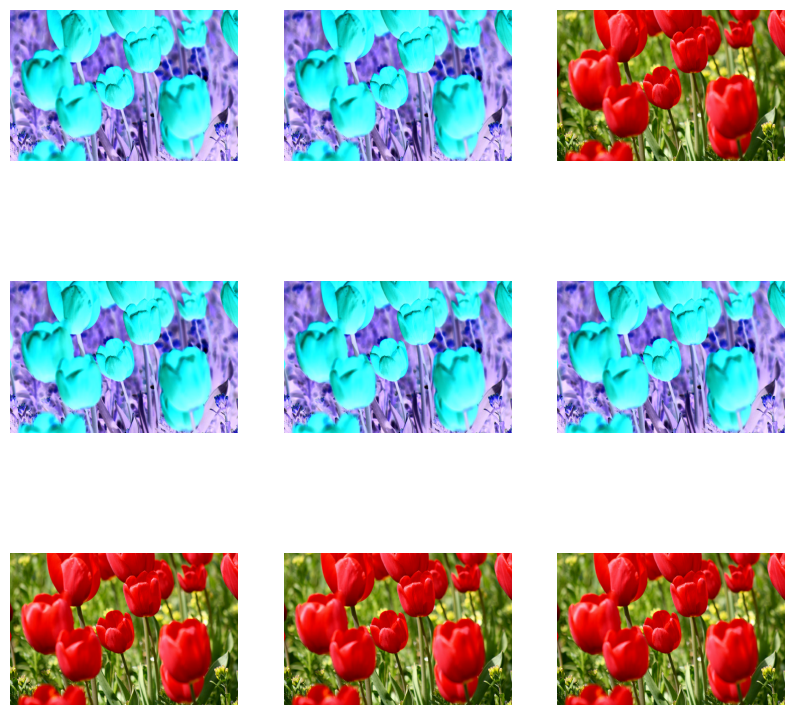

In [37]:
# 확인
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = random_invert(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

##### 방법 3-2 :  서브클래스를 통해 새 레이어를 생성

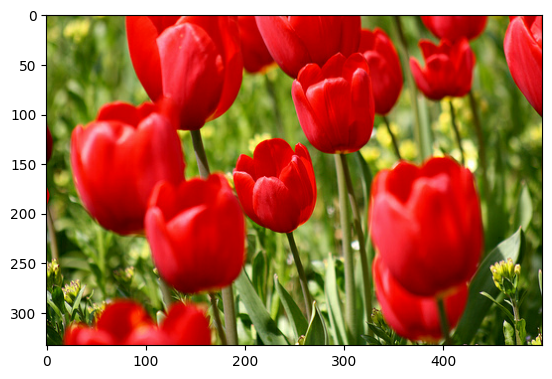

In [38]:
# 방법 3-2 :  서브클래스를 통해 새 레이어를 생성
class RandomInvert(layers.Layer):
  def __init__(self, factor=0.5, **kwargs):
    super().__init__(**kwargs)
    self.factor = factor

  def call(self, x):
    return random_invert_img(x)

_ = plt.imshow(RandomInvert()(image)[0])

#### 방법4 : tf.image를 이용하여 자체 데이터 증강 파이프라인 또는 레이어 작성하기

In [39]:
# 데이터 준비
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

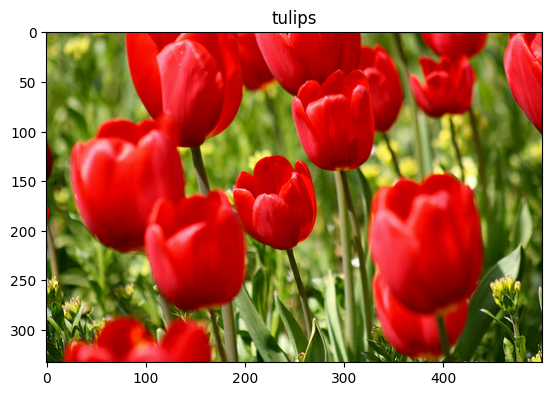

In [40]:
image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [41]:
# 원본 이미지와 증강 이미지를 나란히 비교할 수 있는 함수 생성
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

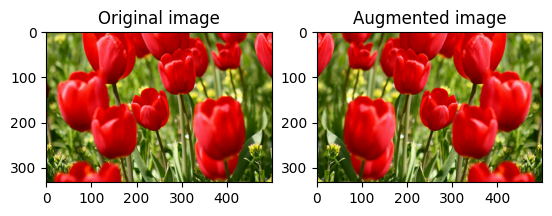

In [42]:
# 이미지 뒤집기
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

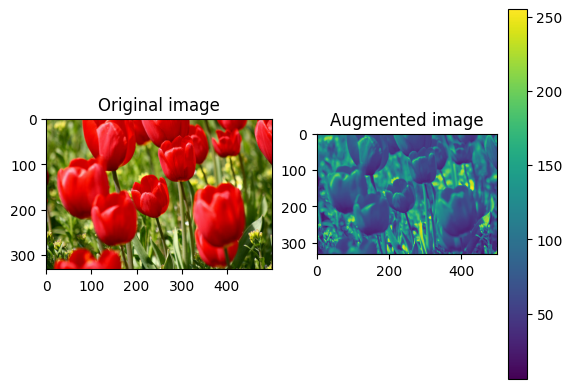

In [43]:
# 그레이 스케일 만들기
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
_ = plt.colorbar()

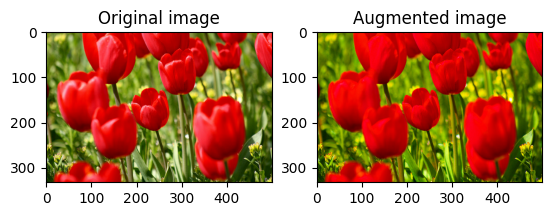

In [44]:
# 포화시키기(채도)
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

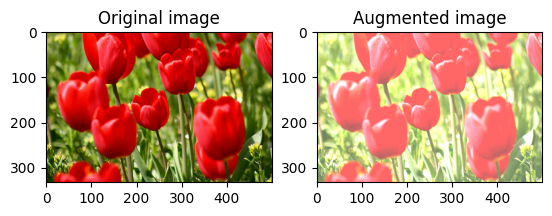

In [45]:
# 이미지 밝기 변경하기
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

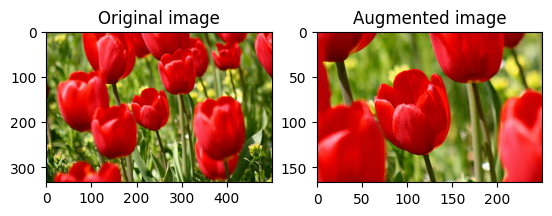

In [46]:
# 이미지 가운데 자르기
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image, cropped)

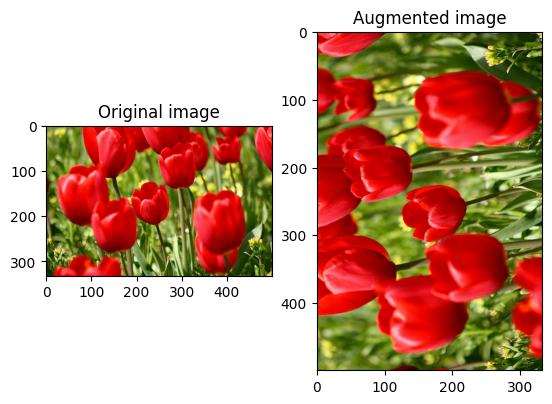

In [47]:
# 이미지 회전하기
rotated = tf.image.rot90(image)
visualize(image, rotated)

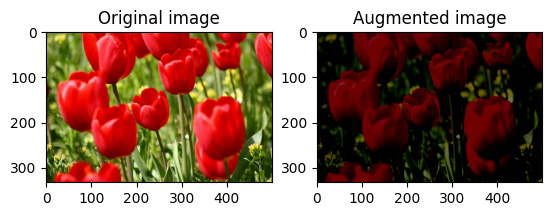

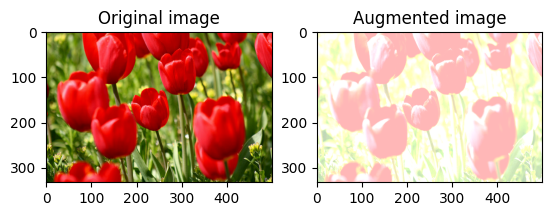

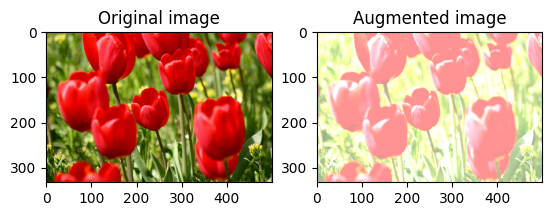

In [48]:
# 무작위 변환

# 무작위 이미지 밝기 변경
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_brightness = tf.image.stateless_random_brightness(
      image, max_delta=0.95, seed=seed)
  visualize(image, stateless_random_brightness)

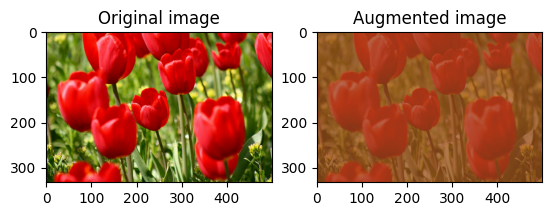

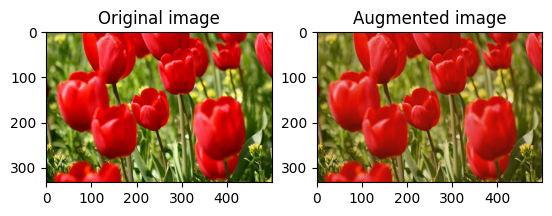

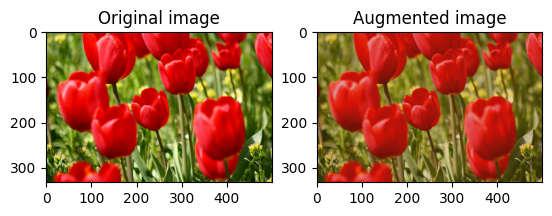

In [49]:
# 무작위 이미지 대비 변경
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_contrast = tf.image.stateless_random_contrast(
      image, lower=0.1, upper=0.9, seed=seed)
  visualize(image, stateless_random_contrast)

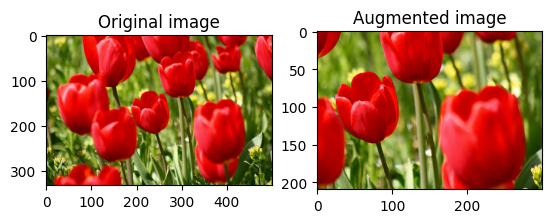

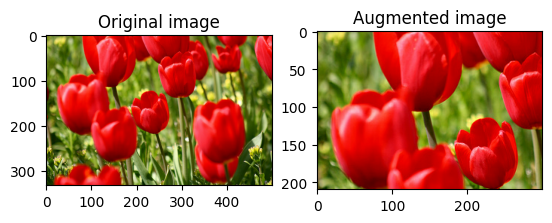

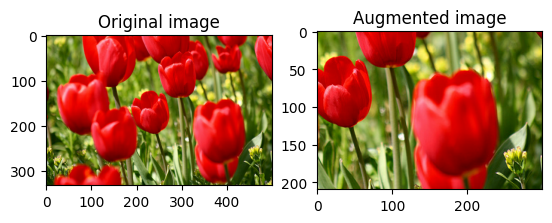

In [50]:
# 무작위 이미지 자르기
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_crop = tf.image.stateless_random_crop(
      image, size=[210, 300, 3], seed=seed)
  visualize(image, stateless_random_crop)

In [51]:
# 데이터세트에 증강 적용하기

# 데이터 준비
(train_datasets, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

# 이미지 크기 및 스케일 조정을 위한 유틸리티 함수를 정의
def resize_and_rescale(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  image = (image / 255.0)
  return image, label

# 무작위 변환 적용 함수
def augment(image_label, seed):
  image, label = image_label
  image, label = resize_and_rescale(image, label)
  image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6)
  # Make a new seed.
  new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
  # Random crop back to the original size.
  image = tf.image.stateless_random_crop(
      image, size=[IMG_SIZE, IMG_SIZE, 3], seed=seed)
  # Random brightness.
  image = tf.image.stateless_random_brightness(
      image, max_delta=0.5, seed=new_seed)
  image = tf.clip_by_value(image, 0, 1)
  return image, label

```tf.data.experimental.Counter``` 객체를 생성하여 데이터세트를 Dataset.zip으로 처리

In [52]:
# Create a `Counter` object and `Dataset.zip` it together with the training set.
counter = tf.data.experimental.Counter()
train_ds = tf.data.Dataset.zip((train_datasets, (counter, counter)))

# augment 함수를 데이터세트에 매핑
train_ds = (
    train_ds
    .shuffle(1000)
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)
val_ds = (
    val_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)
test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

Instructions for updating:
Use `tf.data.Dataset.counter(...)` instead.
